In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model # Import Model to create a sub-model



# **1. Separando em Teste e Treinamento.**

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

train_split_index = int(len(x_train) * (5/6))

x_train_split = x_train[:train_split_index]
y_train_split = y_train[:train_split_index]

x_test_split = x_train[train_split_index:] 
y_test_split = y_train[train_split_index:]

print(f"Original x_train shape: {x_train.shape}")
print(f"Original x_test shape: {x_test.shape}")
print(f"New x_train_split shape: {x_train_split.shape}")
print(f"New y_train_split shape: {y_train_split.shape}")
print(f"New x_test_split (validation) shape: {x_test_split.shape}")
print(f"New y_test_split (validation) shape: {y_test_split.shape}")

Original x_train shape: (50000, 32, 32, 3)
Original x_test shape: (10000, 32, 32, 3)
New x_train_split shape: (41666, 32, 32, 3)
New y_train_split shape: (41666, 10)
New x_test_split (validation) shape: (8334, 32, 32, 3)
New y_test_split (validation) shape: (8334, 10)


# **2. Criando o modelo**

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Matheus Pinto\Documents\fgv\mestrado\Visão_computacional\listas\lista7\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,802 (600.79 KB)

 Trainable params: 153,802 (600.79 KB)

 Non-trainable params: 0 (0.00 B)

# **3. Treinando o modelo.** 

In [4]:
history = model.fit(x_train_split, y_train_split,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test_split, y_test_split), 
                    verbose=1)


Epoch 1/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.3154 - loss: 1.8408 - val_accuracy: 0.4940 - val_loss: 1.4016
Epoch 2/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5286 - loss: 1.3122 - val_accuracy: 0.5271 - val_loss: 1.2769
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5878 - loss: 1.1556 - val_accuracy: 0.6128 - val_loss: 1.0855
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6346 - loss: 1.0258 - val_accuracy: 0.6345 - val_loss: 1.0261
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6610 - loss: 0.9591 - val_accuracy: 0.6383 - val_loss: 1.0527
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6887 - loss: 0.8848 - val_accuracy: 0.6812 - val_loss: 0.8992
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7116 - loss: 0.8159 - val_accuracy: 0.6757 - val_loss: 0.9319
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7290 - loss: 0.7721 - 

In [5]:

print("\nEvaluating model on the original x_test, y_test (unused during training):")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on the original test set: {accuracy*100:.2f}%")

print(f"Final validation accuracy after 10 epochs: {history.history['val_accuracy'][-1]*100:.2f}%")

total_params = model.count_params()
print(f"\nTotal number of parameters in the model: {total_params}")



Evaluating model on the original x_test, y_test (unused during training):
Accuracy on the original test set: 68.93%
Final validation accuracy after 10 epochs: 68.77%

Total number of parameters in the model: 153802


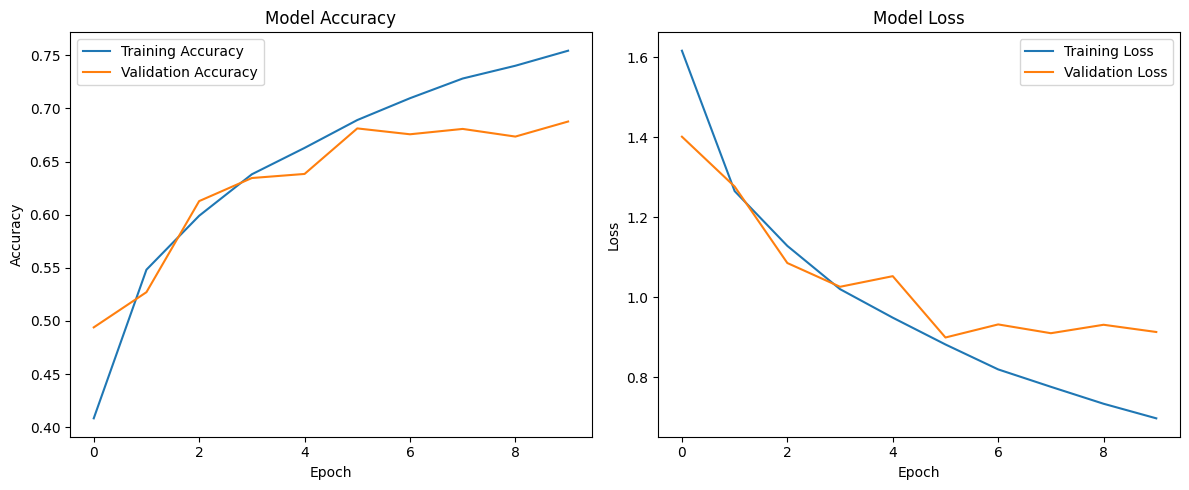

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# **4. Testando o Modelo.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted class: automobile with confidence: 96.53%


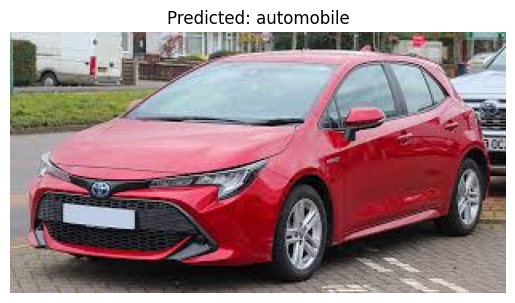

In [7]:
img_path = 'fotos/Untitled.jpeg' 
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names [predicted_class_index]
confidence = predictions [0][predicted_class_index]

print(f"Predicted class: {predicted_class_name} with confidence: {confidence*100:.2f}%")

# Display the image (optional)
import matplotlib.pyplot as plt
img = plt.imread(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

# **5. Visualizando o Modelo.**

In [8]:
img_path = 'fotos/untitled.jpeg' 

try:
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array_processed = img_array / 255.0
except FileNotFoundError:
    print(f"Error: Image not found at {img_path}. Please check the path and try again.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the image: {e}")
    exit()

print(f"Original image shape before processing: {img_array.shape}")
print(f"Image shape after processing for model input: {img_array_processed.shape}")


Original image shape before processing: (1, 32, 32, 3)
Image shape after processing for model input: (1, 32, 32, 3)


In [9]:

predictions = model.predict(img_array_processed)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]
print(f"Full model prediction: {predicted_class_name} with confidence: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Full model prediction: automobile with confidence: 96.53%


In [10]:


layer_outputs = []
layer_names = []

for layer in model.layers:
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

if not layer_outputs:
    print("No Conv2D or MaxPooling2D layers found in the model for visualization.")
    exit()

if model.layers and hasattr(model.layers[0], 'input'):
    model_input_tensor = model.layers[0].input
    print(f"Successfully retrieved input tensor from model.layers[0].input: {model_input_tensor}")

activation_model = Model(inputs=model_input_tensor, outputs=layer_outputs)

activations = activation_model.predict(img_array_processed)



Successfully retrieved input tensor from model.layers[0].input: <KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


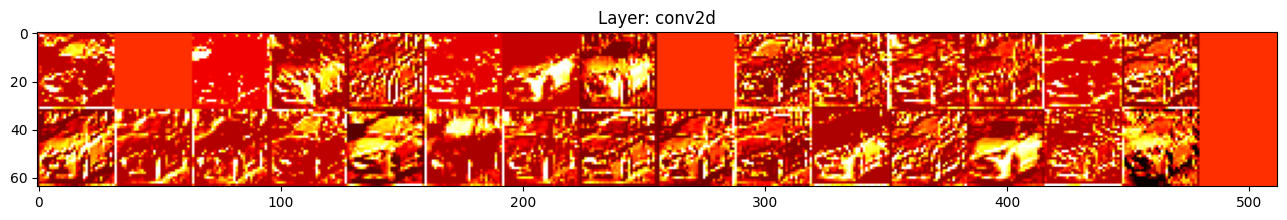

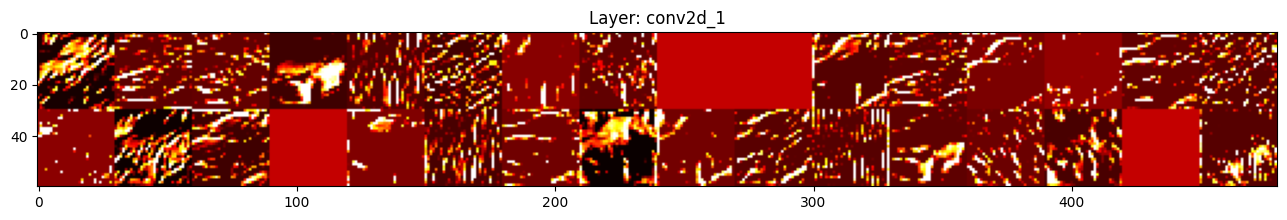

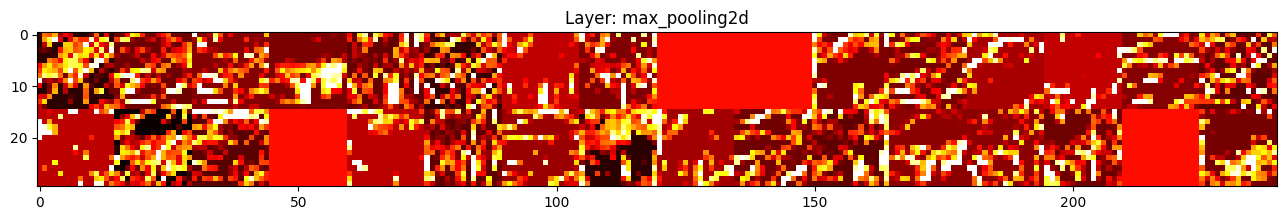

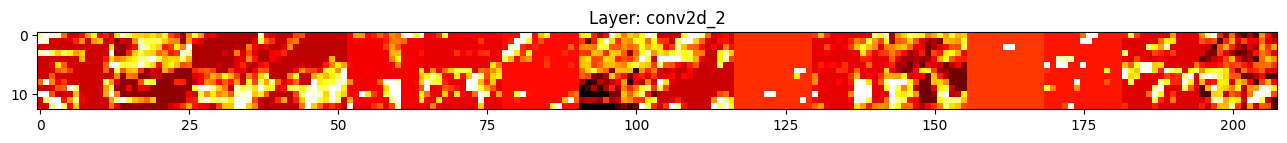

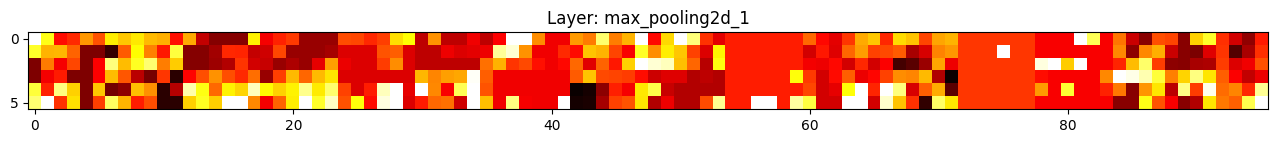

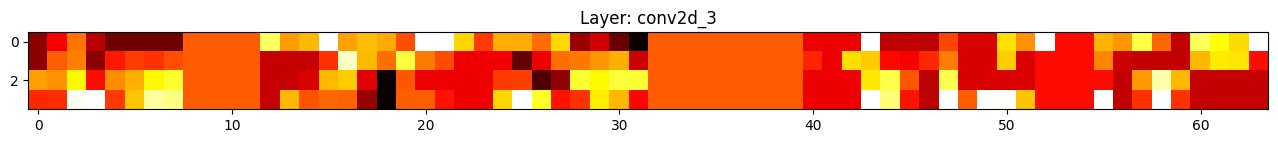

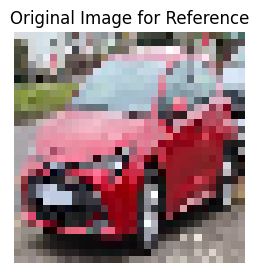

In [11]:

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = int(np.ceil(n_features / images_per_row))
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            if channel_index < n_features:
                channel_image = layer_activation[0, :, :, channel_index]
                if channel_image.std() != 0:
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std() + 1e-5
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')

                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(f"Layer: {layer_name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='hot')
    plt.show()

plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title("Original Image for Reference")
plt.axis('off')
plt.show()